In [ ]:
from google.colab import drive
drive.mount("\content\mydrive")

TIMEOUT: ignored

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from os.path import splitext,basename
from keras.models import model_from_json
import glob
import random

In [ ]:
os.chdir("/content/drive/MyDrive/PlateRecognition_with_DP")
from local_utils import detect_lp

In [ ]:
def load_model(path):
    try:
        path = splitext(path)[0]
        with open('%s.json' % path, 'r') as json_file:
            model_json = json_file.read()
        model = model_from_json(model_json, custom_objects={})
        model.load_weights('%s.h5' % path)
        print("Loading model successfully...")
        return model
    except Exception as e:
        print(e)

In [ ]:
wpod_net_path = "/content/drive/MyDrive/PlateRecognition_with_DP/wpod-net.json"
wpod_net = load_model(wpod_net_path)

Loading model successfully...


In [ ]:
def preprocess_image(image_path,resize=False):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img / 255
    if resize:
        img = cv2.resize(img, (224,224))
    return img

In [ ]:
# Creo un lista di immagini
image_paths = glob.glob("/content/drive/MyDrive/PlateRecognition/images/*.png")
print("Found %i images..."%(len(image_paths)))

# Visualize i dati  nei subplot
fig = plt.figure(figsize=(12,8))
cols = 5
rows = 5
fig_list = []
for i in range(cols*rows):
    fig_list.append(fig.add_subplot(rows,cols,i+1))
    title = splitext(basename(image_paths[i]))[0]
    fig_list[-1].set_title(title)
    img = preprocess_image(image_paths[i],True)
    plt.axis(False)
    plt.imshow(img)

plt.tight_layout(True)
plt.show()

In [ ]:
def get_plate(image_path, Dmax=600, Dmin=256):
    vehicle = preprocess_image(image_path)
    ratio = float(max(vehicle.shape[:2])) / min(vehicle.shape[:2])
    side = int(ratio * Dmin)
    bound_dim = min(side, Dmax)
    _ , LpImg, _, cor = detect_lp(wpod_net, vehicle, bound_dim, lp_threshold=0.5)
    return LpImg, cor

Detect 1 plate(s) in car2
Coordinate of plate(s) in image: 
 [array([[384.2233381 , 608.50555976, 606.42688039, 382.14465873],
       [677.37063138, 692.53912528, 750.29109915, 735.12260526],
       [  1.        ,   1.        ,   1.        ,   1.        ]])]


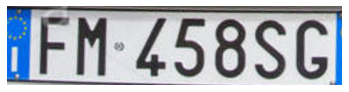

In [ ]:
# ricava la targa e le coordinate
#test_image = image_paths[250]
test_image = "/content/drive/MyDrive/PlateRecognition/italian_cars/car2.jpg"
LpImg,cor = get_plate(test_image)
print("Detect %i plate(s) in"%len(LpImg),splitext(basename(test_image))[0])
print("Coordinate of plate(s) in image: \n", cor)

# Visualizza il risultato
#plt.figure(figsize=(12,5))
#plt.subplot(1,2,1)
#plt.axis(False)
#plt.imshow(preprocess_image(test_image))
plt.plot(1,2,2)
plt.axis(False)
plt.imshow(LpImg[0])

os.chdir("/content/drive/MyDrive/PlateRecognition_with_DP/plate")

i = (random.randint(1, 1000))

plt.savefig("plate{}.png".format(i), dpi=1200)

In [ ]:
def draw_box(image_path, cor, thickness=3): 
    pts=[]  
    x_coordinates=cor[0][0]
    y_coordinates=cor[0][1]
    # store the top-left, top-right, bottom-left, bottom-right 
    # of the plate license respectively
    for i in range(4):
        pts.append([int(x_coordinates[i]),int(y_coordinates[i])])
    
    pts = np.array(pts, np.int32)
    pts = pts.reshape((-1,1,2))
    vehicle_image = preprocess_image(image_path)
    
    cv2.polylines(vehicle_image,[pts],True,(0,255,0),thickness)
    return vehicle_image

plt.figure(figsize=(8,8))
plt.axis(False)
plt.imshow(draw_box(test_image,cor))

In [ ]:
os.chdir("/content/drive/MyDrive/PlateRecognition_with_DP/plate")

i = 0
while i<len(image_paths):
    try:
      LpImg, _ = get_plate(image_paths[i])
      plt.imshow("Plate {}".format(i),LpImg[0])
      plt.savefig("plate{}.png".format(i), dpi=1200)
      i+=1
    except AssertionError:
      i+=1

In [ ]:
# Estarre targhe multiple in un ' immagine 

multiple_plates_image = ""
LpImg,cor = get_plate(multiple_plates_image)

print("Detect %i plate(s) in"%len(LpImg),splitext(basename(multiple_plates_image))[0])

# Visualize the original image
plt.figure(figsize=(10,5))
plt.axis(False)
plt.imshow(preprocess_image(multiple_plates_image))

# Visualize the obtained plates
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.axis(False)
plt.imshow(LpImg[1])
plt.subplot(1,2,2)
plt.axis(False)